[View in Colaboratory](https://colab.research.google.com/github/monabiyan/Deep_Autoencoders/blob/master/sorting_deep_learning.ipynb)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
omid
(100000, 1000)
(100000, 1000)
baba
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                30030     
_________________________________________________________________
dense_29 (Dense)             (None, 20)                620       
___________________________________________

50000/50000 [==============================] - 9s 170us/step - loss: 3467.1310 - mean_absolute_error: 17.9953
Epoch 2/30
50000/50000 [==============================] - 8s 154us/step - loss: 132.4945 - mean_absolute_error: 8.9421
Epoch 3/30
50000/50000 [==============================] - 8s 160us/step - loss: 132.0972 - mean_absolute_error: 8.9180
Epoch 4/30
  992/50000 [..............................] - ETA: 8s - loss: 123.2759 - mean_absolute_error: 8.5956

50000/50000 [==============================] - 8s 162us/step - loss: 132.9579 - mean_absolute_error: 8.9502
Epoch 5/30
50000/50000 [==============================] - 8s 155us/step - loss: 130.8239 - mean_absolute_error: 8.8732
Epoch 6/30
49984/50000 [============================>.] - ETA: 0s - loss: 130.0055 - mean_absolute_error: 8.8461

50000/50000 [==============================] - 8s 158us/step - loss: 130.0040 - mean_absolute_error: 8.8460
Epoch 7/30
50000/50000 [==============================] - 8s 157us/step - loss: 128.8179 - mean_absolute_error: 8.8083
Epoch 8/30
50000/50000 [==============================] - 8s 152us/step - loss: 128.4154 - mean_absolute_error: 8.7884
Epoch 9/30
11936/50000 [======>.......................] - ETA: 5s - loss: 126.6865 - mean_absolute_error: 8.7398

50000/50000 [==============================] - 8s 155us/step - loss: 128.2334 - mean_absolute_error: 8.7861
Epoch 10/30
50000/50000 [==============================] - 8s 155us/step - loss: 127.6711 - mean_absolute_error: 8.7704
Epoch 11/30
50000/50000 [==============================] - 8s 159us/step - loss: 127.2039 - mean_absolute_error: 8.7427
Epoch 12/30
 1952/50000 [>.............................] - ETA: 7s - loss: 126.8218 - mean_absolute_error: 8.7419

50000/50000 [==============================] - 8s 162us/step - loss: 125.7172 - mean_absolute_error: 8.6944
Epoch 13/30
50000/50000 [==============================] - 8s 162us/step - loss: 125.8784 - mean_absolute_error: 8.7013
Epoch 14/30
47648/50000 [===========================>..] - ETA: 0s - loss: 124.4992 - mean_absolute_error: 8.6499

50000/50000 [==============================] - 8s 160us/step - loss: 124.5436 - mean_absolute_error: 8.6525
Epoch 15/30
50000/50000 [==============================] - 8s 160us/step - loss: 125.8336 - mean_absolute_error: 8.6999
Epoch 16/30
50000/50000 [==============================] - 8s 163us/step - loss: 124.3766 - mean_absolute_error: 8.6478
Epoch 17/30
 8000/50000 [===>..........................] - ETA: 6s - loss: 124.5998 - mean_absolute_error: 8.6379

50000/50000 [==============================] - 8s 161us/step - loss: 122.8063 - mean_absolute_error: 8.5932
Epoch 18/30
50000/50000 [==============================] - 8s 164us/step - loss: 124.3516 - mean_absolute_error: 8.6493
Epoch 19/30
48544/50000 [============================>.] - ETA: 0s - loss: 123.6103 - mean_absolute_error: 8.6170

50000/50000 [==============================] - 8s 163us/step - loss: 123.5242 - mean_absolute_error: 8.6135
Epoch 20/30
50000/50000 [==============================] - 8s 157us/step - loss: 122.3716 - mean_absolute_error: 8.5772
Epoch 21/30
50000/50000 [==============================] - 8s 162us/step - loss: 121.8587 - mean_absolute_error: 8.5632
Epoch 22/30
 8640/50000 [====>.........................] - ETA: 6s - loss: 120.6159 - mean_absolute_error: 8.5089

50000/50000 [==============================] - 8s 156us/step - loss: 121.0220 - mean_absolute_error: 8.5302
Epoch 23/30
50000/50000 [==============================] - 8s 154us/step - loss: 121.8716 - mean_absolute_error: 8.5654
Epoch 24/30
50000/50000 [==============================] - 8s 155us/step - loss: 121.8913 - mean_absolute_error: 8.5622
Epoch 25/30
 2144/50000 [>.............................] - ETA: 7s - loss: 118.5299 - mean_absolute_error: 8.4534

50000/50000 [==============================] - 8s 157us/step - loss: 120.7280 - mean_absolute_error: 8.5157
Epoch 26/30
50000/50000 [==============================] - 8s 161us/step - loss: 121.1378 - mean_absolute_error: 8.5324
Epoch 27/30
49312/50000 [============================>.] - ETA: 0s - loss: 121.1190 - mean_absolute_error: 8.5326

50000/50000 [==============================] - 8s 156us/step - loss: 121.0498 - mean_absolute_error: 8.5299
Epoch 28/30
50000/50000 [==============================] - 8s 158us/step - loss: 120.7657 - mean_absolute_error: 8.5222
Epoch 29/30
50000/50000 [==============================] - 8s 157us/step - loss: 120.4359 - mean_absolute_error: 8.5073
Epoch 30/30
 9440/50000 [====>.........................] - ETA: 6s - loss: 119.3144 - mean_absolute_error: 8.4682

50000/50000 [==============================] - 8s 161us/step - loss: 119.8875 - mean_absolute_error: 8.4901
accuracy
4626.454496650839
vs
166516.7299
--- 1.6249897480010986 seconds ---
--- 2.026069402694702 seconds ---
[  0   1   3   2   3   3   5   6   6   8   8   9  10  10  10  12  10  13
  14  15  16  17  16  17  21  21  23  23  25  23  25  26  31  29  30  29
  33  32  32  36  37  37  39  36  39  43  40  45  44  44  46  46  50  48
  49  50  52  54  55  56  55  56  58  59  60  60  62  64  63  63  66  67
  67  69  70  70  72  73  73  73  74  75  77  78  79  80  81  83  83  84
  85  85  87  87  89  89  89  92  93  94  94  96  96  98  99 100 100 101
 103 103 105 105 106 106 108 108 110 110 111 112 113 113 115 116 117 118
 119 121 121 122 123 124 125 126 126 127 129 130 130 131 132 133 134 135
 137 137 139 139 140 141 142 144 144 145 145 147 149 149 150 152 152 153
 155 156 156 157 157 161 161 163 161 164 162 166 166 166 168 170 171 171
 171 171 173 173 176 176 177 178 180 178 180 182 18

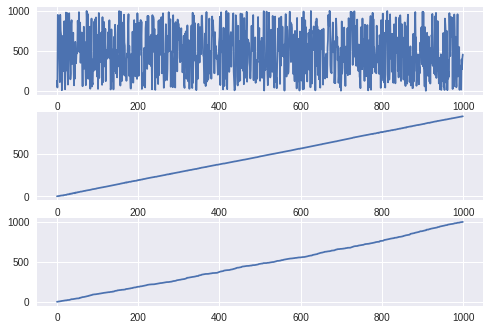

In [20]:
def sorting_deep_learning():
    import random
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.models import load_model
    from keras import backend as K
    from keras.utils.generic_utils import get_custom_objects
    from keras.layers import Activation
    import numpy as np
    import matplotlib.pyplot as plt
    
    all_x=[]
    all_y=[]
    nn=100000
    max_no=1000
    for i in range(nn):
        if i % 1000 == 0:
            print(i)
        my_list=np.random.choice(max_no,max_no,replace=True)
        all_x.append(my_list)
        all_y.append(sorted(my_list))



    all_x=np.array(all_x)
    all_y=np.array(all_y)

    all_x_train=all_x[0:int(nn/2)]
    all_y_train = all_y[0:int(nn / 2)]
    all_x_test = all_x[int(nn / 2) +1:nn]
    all_y_test = all_y[int(nn / 2) +1:nn]

    print('omid')
    print(all_x.shape)
    print(all_y.shape)
    print('baba')



    #######  custom_activation  ################################
    def custom_activation(x):
        return (K.round(x))
    get_custom_objects().update({'custom_activation': Activation(custom_activation)})
    #######  custom_activation finish ################################



    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=max_no))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(max_no, activation='linear'))

    # model.compile(loss='mean_squared_error', optimizer='sgd')
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    model.summary()
    model.fit(all_x_train,all_y_train, epochs=30, batch_size=32)
    prediction = model.predict(all_x_test)
    print('accuracy')
    print(np.sum(np.abs(all_y_test-prediction))/nn)
    print('vs')
    print(np.sum(np.abs(all_y_test-all_x_test))/nn)
#     print(all_x_test[0])
#     print(model.predict(all_x_test)[0].astype(int))
#     model.save('sorting_model.h5')
#     model1a = load_model('sorting_model.h5')

    import time

    start_time = time.time()
    prediction2 = model.predict(all_x_test)
    print("--- %s seconds ---" % (time.time() - start_time))

    start_time = time.time()
    algo_sort=np.sort(all_x_test)
    print("--- %s seconds ---" % (time.time() - start_time))
    pr=prediction2[0].astype(int)
    print(pr)
    print(algo_sort[0])
    plt.subplot(3,1,1)
    plt.plot(all_x_test[0])
    plt.subplot(3, 1, 2)
    plt.plot(pr)
    plt.subplot(3, 1, 3)
    plt.plot(algo_sort[0])
    plt.show()

sorting_deep_learning()